<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="max-width: 250px; display: inline"  alt="Wikistat"/></a>

<a href="http://www.math.univ-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo_imt.jpg" style="float:right; max-width: 250px; display: inline" alt="IMT"/> </a>
</center>

# [Scénarios d'Apprentissage Statistique](https://github.com/wikistat/Apprentissage)

#  Exemple "Jouet": Discrimination de Mélanges Gaussiens avec <a href="https://cran.r-project.org/"><img src="https://cran.r-project.org/Rlogo.svg" style="max-width: 40px; display: inline" alt="R"/></a>

**Résumé**: Les méthodes de [discrimination](http://wikistat.fr/pdf/st-m-app-intro.pdf) sont  comparées sur un jeu de données fictif obtenu par la simulation d'observations $(x_i, y_i), i=1\ldots,n$ suivant 4 gaussiennes bidimensionnelles et séparées en 2 classes. L'objectif est de mettre en évidence le rôle des paramètres de complexité de différentes méthodes (régression logistique, k-nn, réseaux de neurones, arbre de décision, bagging, svm) et de comparer les formes spécifiques des frontières estimées par chacune d'elle.

## 1 Introduction
Les données très rudimentaires ont été obtenues par la simulation de 4 gaussiennes bidimensionnelles ; 3 gaussiennes sont associées à une classe la 4ème à une autre classes. L'objectif est d'apprendre ces données très particulières afin de discriminer les deux classes. Les données étant simplement dans $\boldsymbol{R}^2$, il est facile de prévoir la classe de chaque point du plan et ainsi de visualiser la frontière entre les prévisions des deux classes. L'intérêt est de représenter ainsi facilement le rôle jouer par les paramètres de complexité de chaque méthode et de comparer les formes des frontières obtenues et donc la plus ou moins bonne adéquation d'une méthode à la spécificité de ces données simulées. 

## 2 Les données 
Sans passer par le format Matlab d'origine, charger les données au format texte du fichier [clouds.dat](http://www.math.univ-toulouse.fr/~besse/Wikistat/data/clouds.dat) ou les lire directement.

### 2.1 Données d'apprentissage

In [15]:
# Lecture
path="http://www.math.univ-toulouse.fr/~besse/Wikistat/data/"
#path=""
cloud=read.table(paste(path,"clouds.dat",sep=""))
cloud[,1]=as.factor(cloud[,1])
summary(cloud)

 classe         X                 Y          
 0:2500   Min.   :-3.2919   Min.   :-3.6399  
 1:2500   1st Qu.:-0.2157   1st Qu.:-0.2177  
          Median : 0.1676   Median : 0.3539  
          Mean   : 0.4924   Mean   : 0.5224  
          3rd Qu.: 1.7283   3rd Qu.: 1.4423  
          Max.   : 3.4806   Max.   : 4.7569  

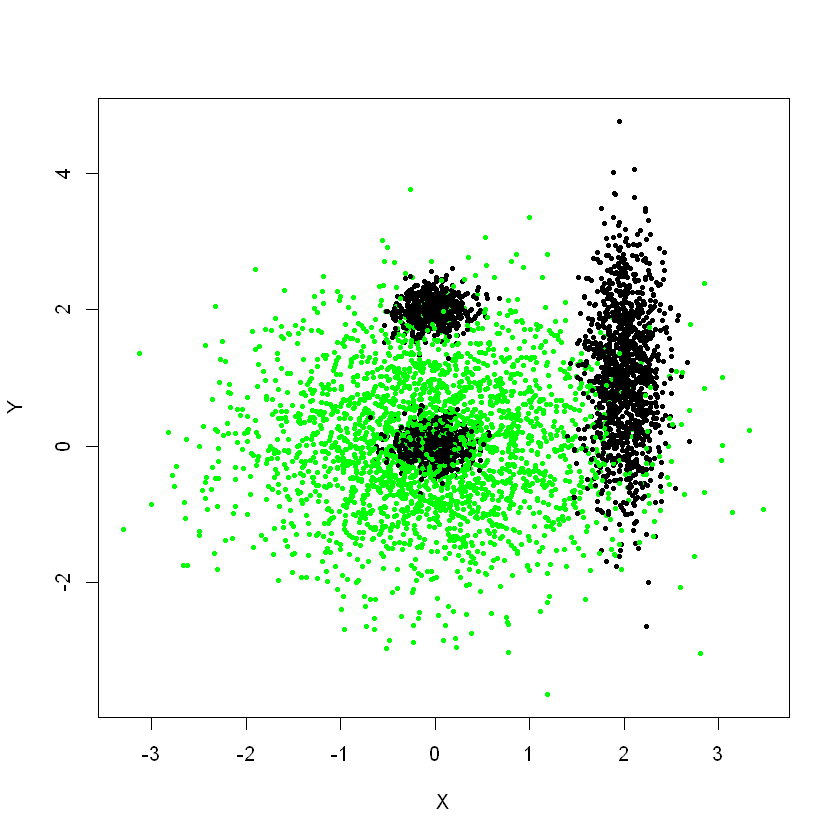

In [16]:
# Nuage de points de "clouds"
plot(cloud[,2:3],col=c("black", "green")
     [as.integer(cloud[,1])],pch=16,cex=.5)

### 2.2 Données de test

Construction des données de "test" ou plutôt de tous les points du plan $(X, Y)$ et dont la prévision "dessinera" les frontières des classes. 

In [17]:
testy=rep(seq(-5,5,length.out = 100),100)
testx=sort(rep(seq(-5,5,length.out = 100),100))
test=data.frame("X"=testx,"Y"=testy)
summary(test)

       X              Y       
 Min.   :-5.0   Min.   :-5.0  
 1st Qu.:-2.5   1st Qu.:-2.5  
 Median : 0.0   Median : 0.0  
 Mean   : 0.0   Mean   : 0.0  
 3rd Qu.: 2.5   3rd Qu.: 2.5  
 Max.   : 5.0   Max.   : 5.0  

## 3 Méthodes de classification
L'objectif est donc d'apprendre la discrimination entre les deux classes des nuages de points. L'utilisation de chaque méthode suit le méme déroulement : 
- Estimation du modéle pour une complexité donnée,
- prévision des points du plan,
- représentation des classes prévues dans le plan
- méme chose pour différentes valeurs du ou des paramétres de complexité, 
- optimisation de la complexité
- estimation et conservation de la prévision "optimale".

### 3.1 Régression logistique
Une méthode linéaire n'est évidemment pas adaptée à la forme particulière des données. D'autre part, comme seule deux variables sont concernées, la complexité ne peut être optimisée.

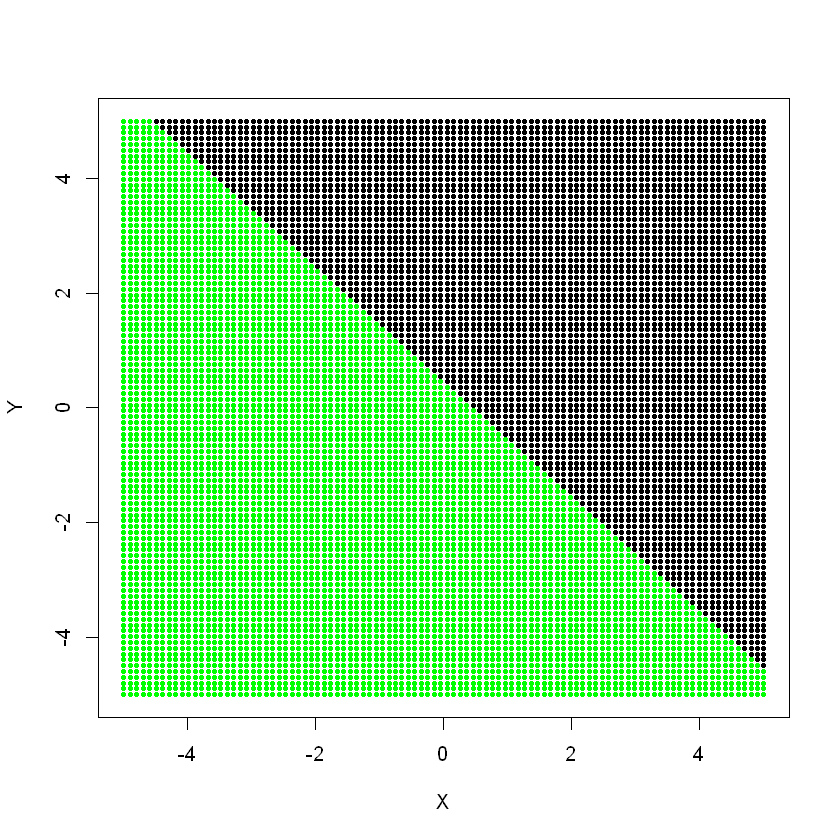

In [18]:
# estimation du modéle
mod.logit=glm(classe~.,data=cloud,family=binomial)
# prévision des points du plan
pred.logit=predict(mod.logit,newdata=test)>0.5
# représentation des prévisions des classes
plot(test, col=c("black", "green")[as.numeric(pred.logit)+1], pch = 19,cex=.5)

### 3.2 Analyse discriminante par $k-nn$
Prévision et tracés pour plusieurs valeurs de $k$ avant optimisation.

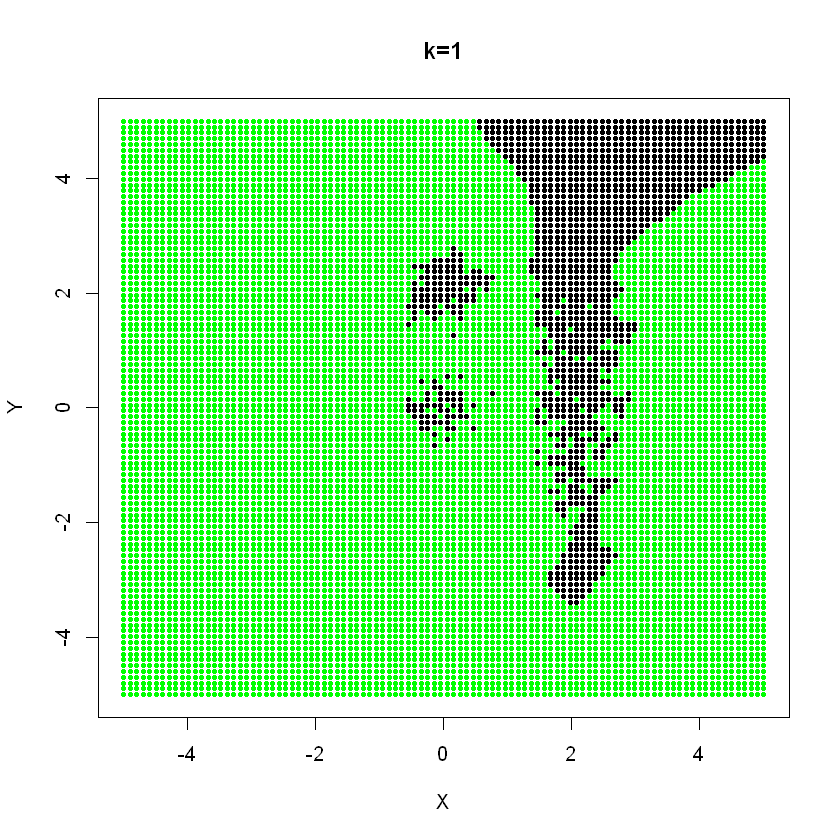

In [19]:
library(class)
# k "petit"
prev.knn = knn(cloud[,2:3], test, cloud[,1],k=1)
plot(test, col=c("black", "green")[as.numeric(prev.knn)],pch = 19,cex=.5,main="k=1")

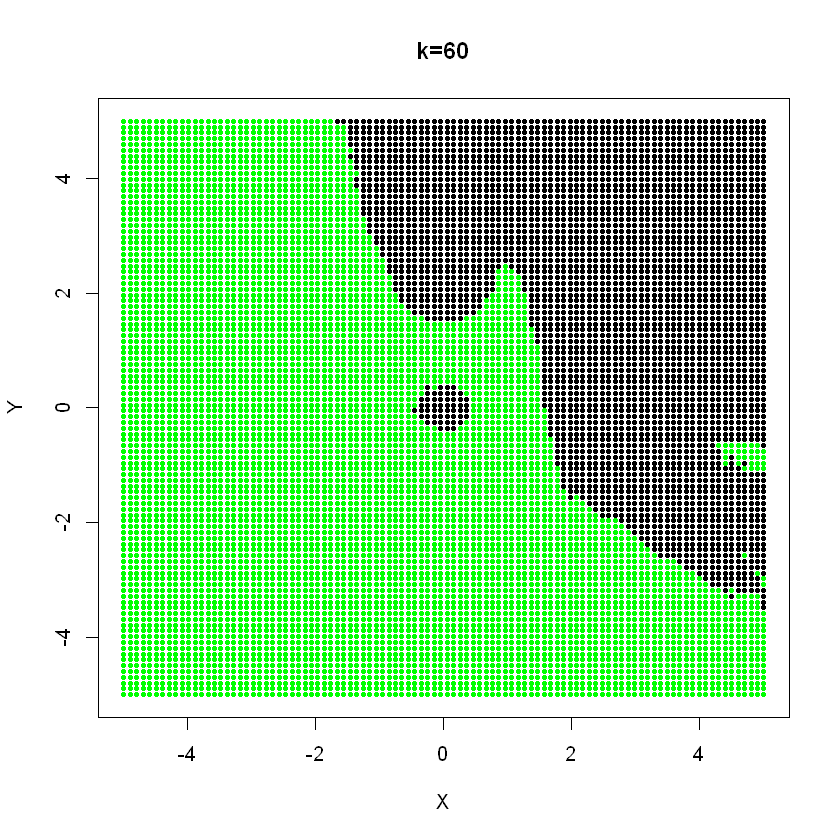

In [20]:
# k "grand"
prev.knn = knn(cloud[,2:3], test, cloud[,1],k=60)
plot(test, col=c("black", "green")[as.numeric(prev.knn)],pch = 19,cex=.5,main="k=60")

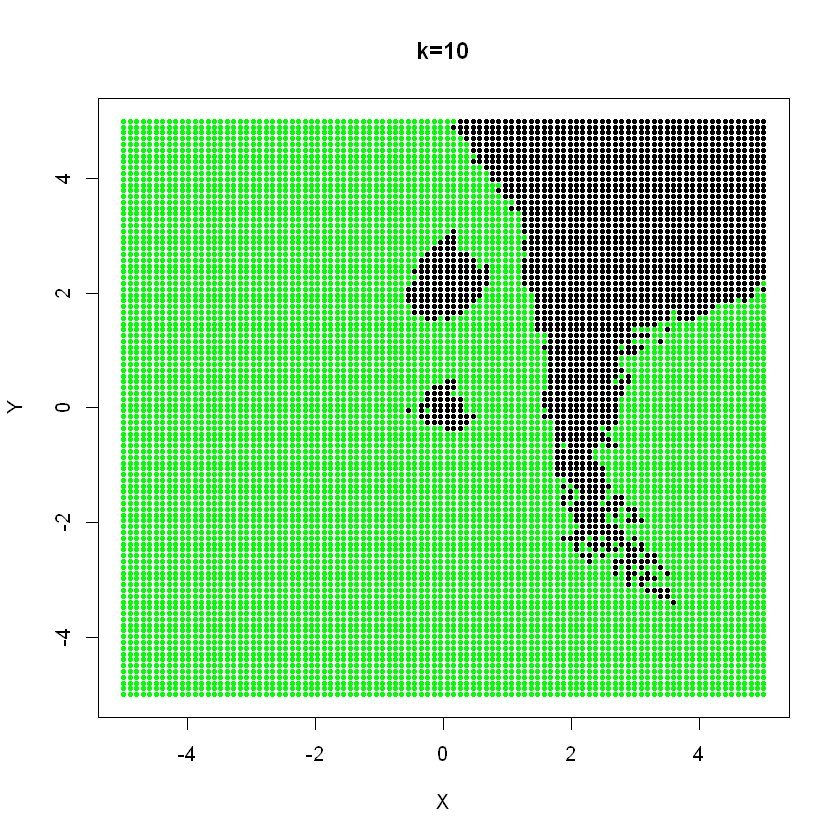

In [24]:
# choix k "optimal"
prev.knn = knn(cloud[,2:3], test, cloud[,1],k=10)
plot(test, col=c("black", "green")[as.numeric(prev.knn)],pch = 19,cex=.5,main="k=10")

Détermination de $k$ "optimal" par validation croisé.

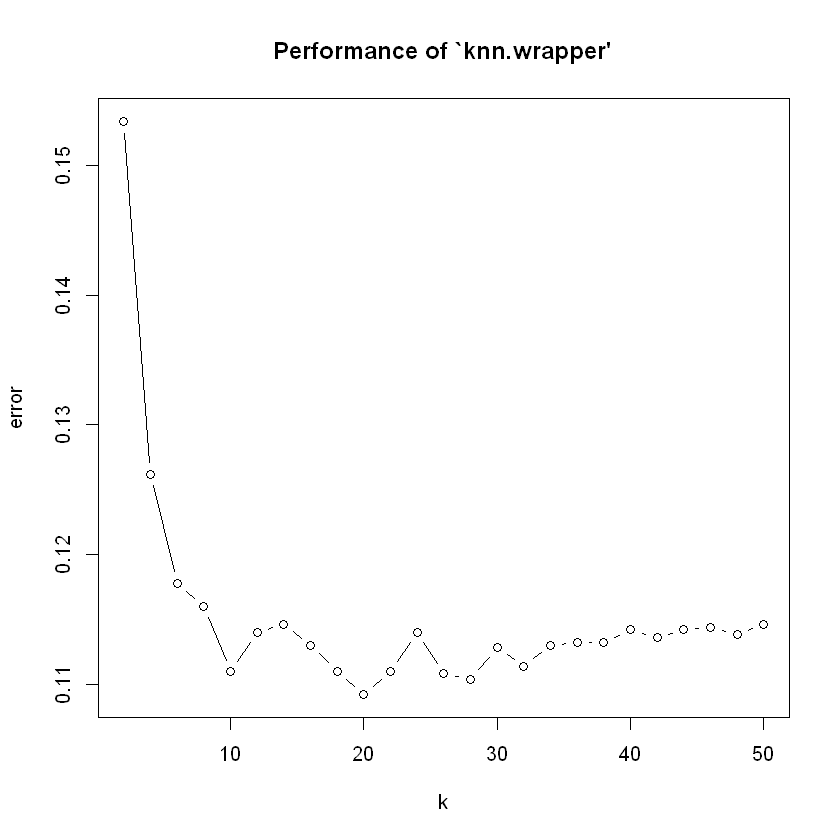

In [22]:
# Optimisation de k
library(e1071)
plot(tune.knn(cloud[,2:3],cloud[,1],k=seq(2,50, by=2)))

### 3.3 Arbre binaire de discrimination
L'optimisation de la complexité (paramétre `cp` est opérée de façon directe comme suggérée dans la librairie `rpart`.

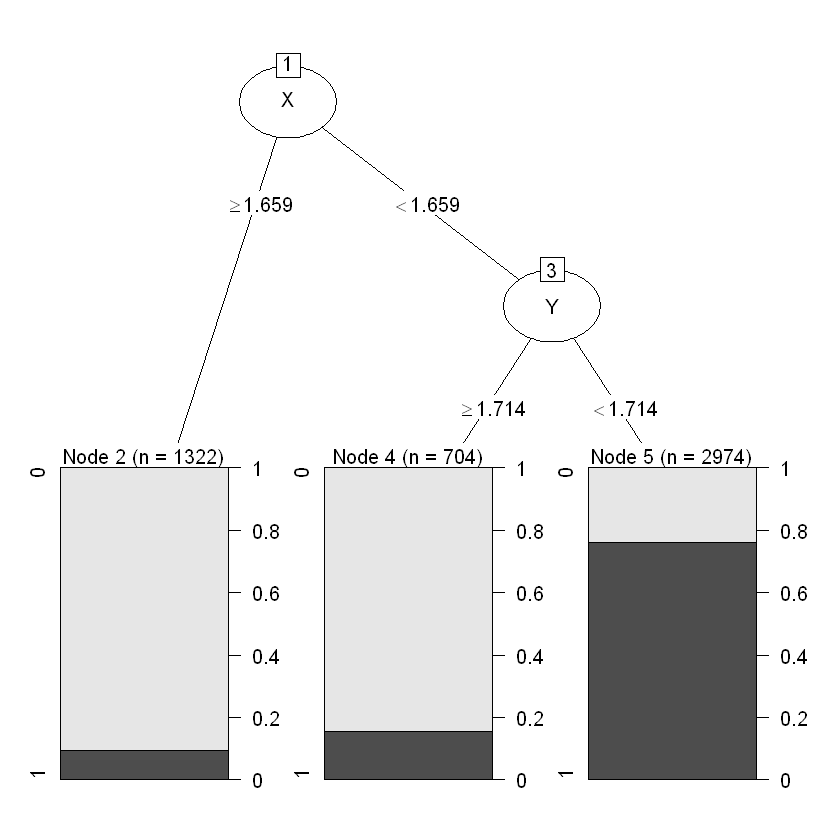

In [25]:
library(rpart) 
# forte pénalité
mod.tree=rpart(classe~.,data=cloud,parms=list(split="information"),cp=0.1)
# summary(mod.tree)
# en commentaire car trop bavarde
# Tracé de l'arbre 
library(partykit) # si java est bien installé
plot(as.party(mod.tree))

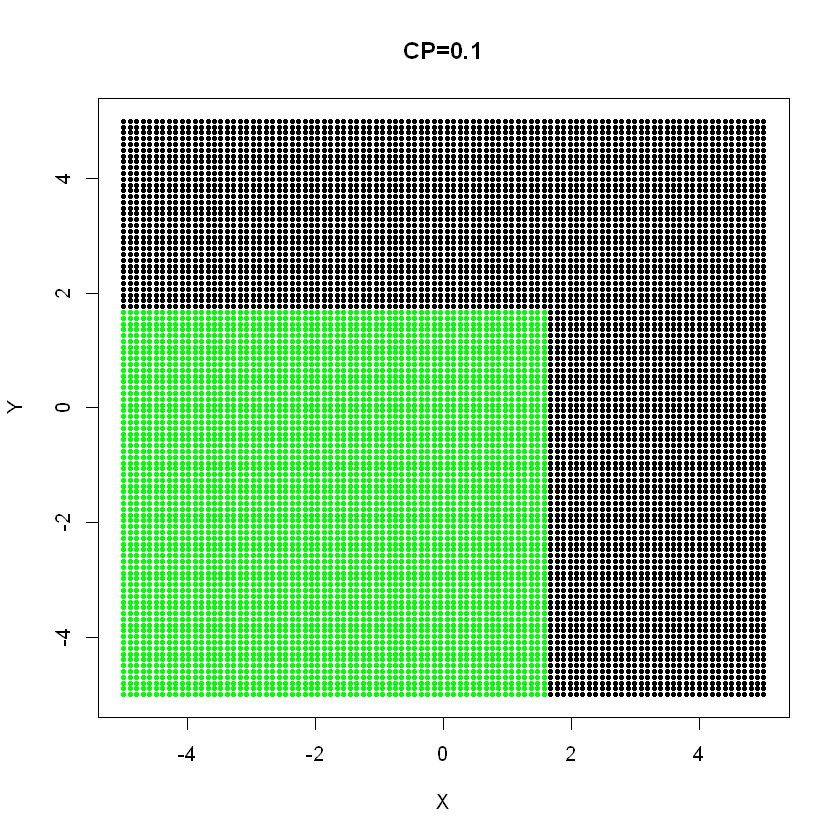

In [26]:
pred.tree=predict(mod.tree,newdata=test,type="class")
plot(test, col=c("black", "green")[as.numeric(pred.tree)], pch = 19,cex=.5,main="CP=0.1")

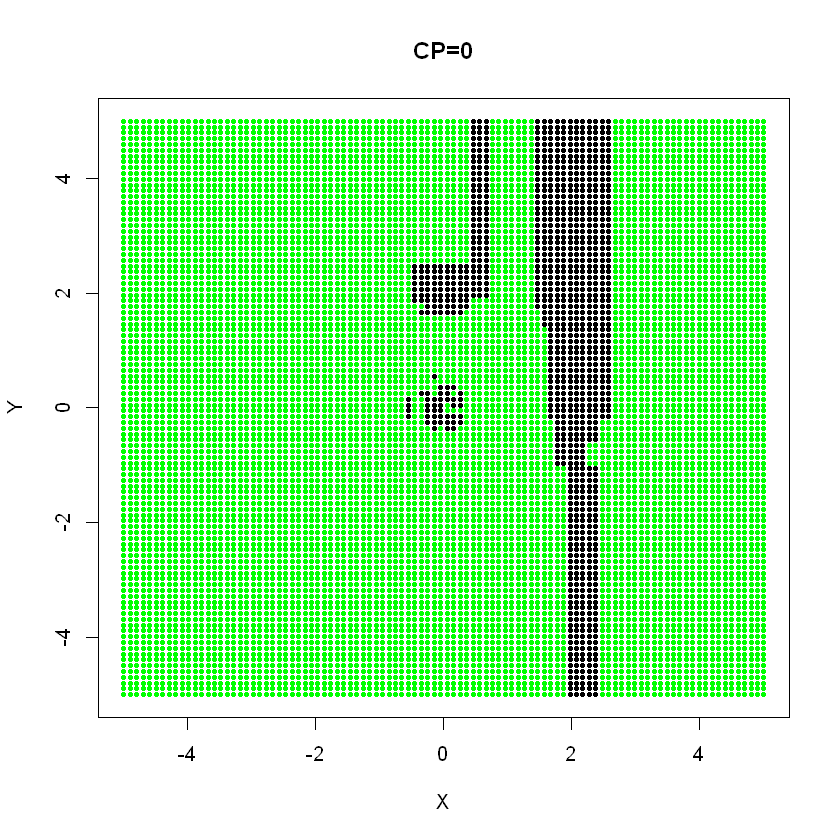

In [27]:
# pénalité nulle
mod.tree=rpart(classe~.,data=cloud,parms=list(split="information"),cp=0)
pred.tree=predict(mod.tree,newdata=test,type="class")
plot(test, col=c("black", "green")[as.numeric(pred.tree)], pch = 19,cex=.5,main="CP=0")

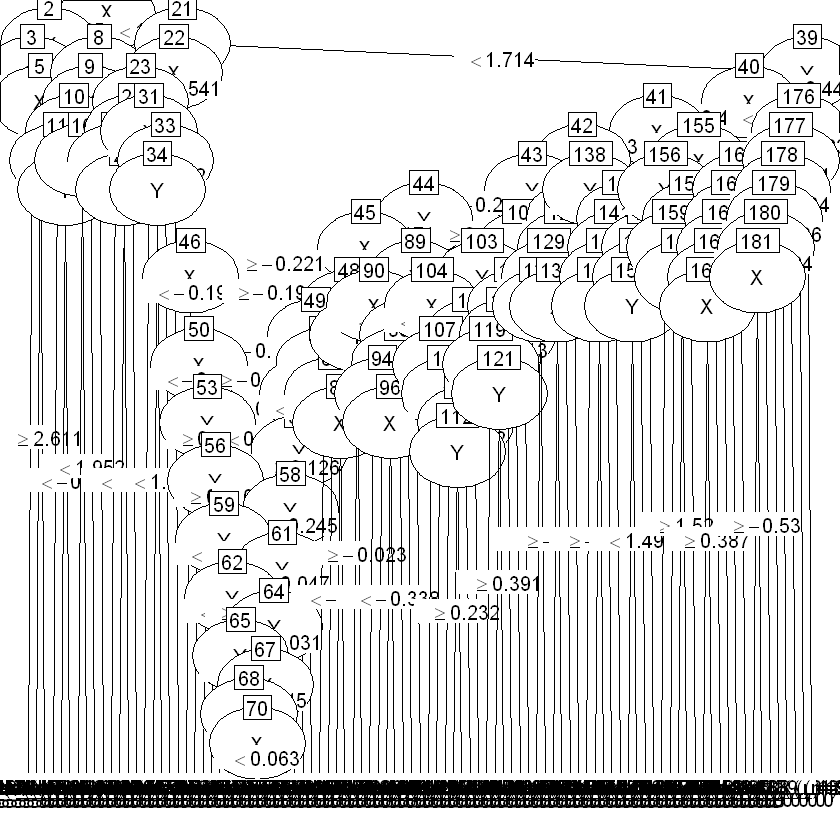

In [28]:
plot(as.party(mod.tree))

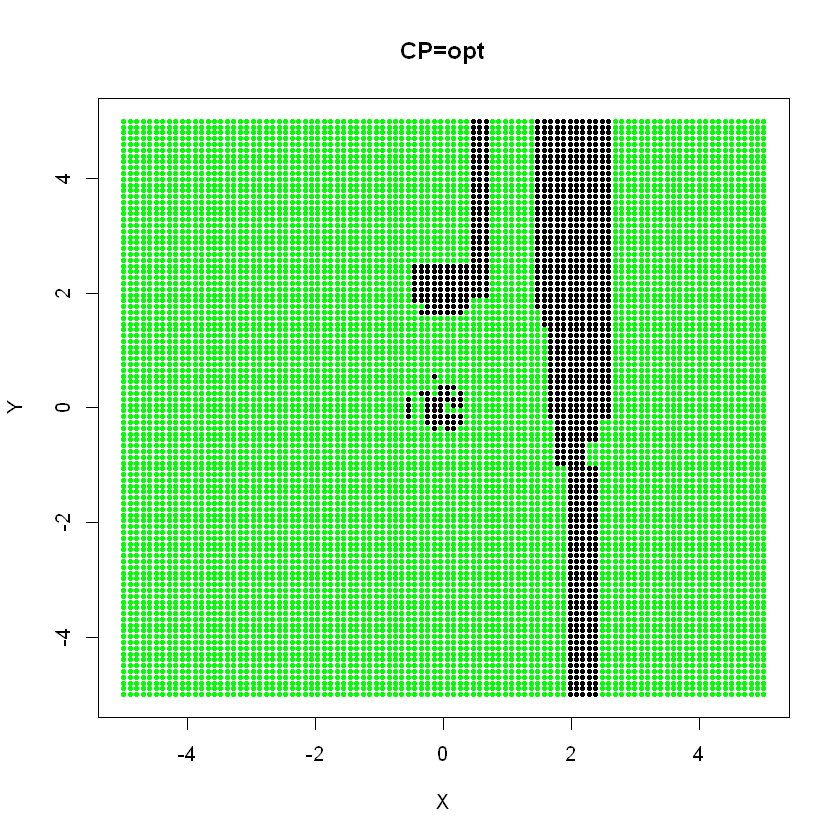

In [29]:
# "optimisation" de cp par validation croisée
xmat = xpred.rpart(mod.tree)
# Comparaison des valeurs prédites et observées
xerr=as.integer(cloud[,"classe"])!= xmat
# Calcul et affichage des estimations des taux d'erreur
# apply(xerr, 2, sum)/nrow(xerr)
# recherche du minimum
cpopt=which.min(apply(xerr, 2, sum)/nrow(xerr))
opt.tree=prune(mod.tree,cp=cpopt)
pred.tree=predict(mod.tree,newdata=test,type="class")
plot(test, col=c("black", "green")[as.numeric(pred.tree)], pch = 19,cex=.5,main="CP=opt")

### 3.4 Réseaux de neurones
Au moins deux paramétres de complexité peuvent étre considérés : le nombre de neurones et le pénalisation de type *ridge* (`decay`).

In [ ]:
library(nnet)
# sans contrainte
mod.rn=nnet(classe~.,data=cloud,size=10,decay=0)
pred.rn=predict(mod.rn,newdata=test,type="class")
plot(test, col=c("black", "green")[as.numeric(pred.rn)+1], pch = 19,cex=.5,main="size=10 et decay=0")

In [ ]:
# forte pénalisation
mod.rn=nnet(classe~.,data=cloud,size=10,decay=5)
pred.rn=predict(mod.rn,newdata=test,type="class")
plot(test, col=c("black", "green")[as.numeric(pred.rn)+1], pch = 19,cex=.5,main="size=10 et decay=5")

In [ ]:
# "optimisation" à exécuter avec un peu de temps
# devant soi... (retirer les ##)
plot(tune.nnet(classe~.,data=cloud,
    size=c(3,4,5),decay=c(0,1,2),maxit=200))

In [ ]:
# choix "optimal"
mod.rn=nnet(classe~.,data=cloud,size=5,decay=0,maxit=200)
pred.rn=predict(mod.rn,newdata=test,type="class")
plot(test, col=c("black", "green")[as.numeric(pred.rn)+1], pch = 19,cex=.5,main="size=5 et decay=0")

### 3.4 Agrégation de modéles
En dimension 2, les algorithmes d'agrégation ont bien moins d'intérét d'autant que celui des foréts aléatoires ne se distingue pas du *bagging. Seul ce dernier est testé. Observer l'évolution des frontiéres avec l'accroissement du nombre d'arbres dans l'agrégation.

In [ ]:
install.packages("ipred",repo="http://cran.r-project.org")

In [ ]:
library(ipred)
for (i in c(1,4,10,100)) {
mod.bag=bagging(classe~.,data=cloud,nbag=i)
pred.bag=predict(mod.bag,newdata=test,type="class")
plot(test, col=c("black", "green")
   [as.numeric(pred.bag)], pch = 19,cex=.5,
   main=paste("N=",as.character(i)))
   }

### 3.5 Machines à vecteurs supports
Deux noyaux sont testés, celui linéaire simplement pour mémoire alors que celui gaussien ({\tt radial}) fait intervenir deux paramétres : la pénalisation ({\tt cost}) de mauvais classement et la "largeur" ({\tt gamma}) du noyau gaussien. Deux valeurs relativement extrémes sont testées avant de les optimiser.

#### Noyau linéaire

In [ ]:
mod.svm=svm(classe~.,data=cloud,kernel="linear")
pred.svm=predict(mod.svm,newdata=test)
plot(test, col=c("black", "green")[as.numeric(pred.svm)], pch = 19,cex=.5)

#### Noyau gaussien

In [ ]:
mod.svm=svm(classe~.,data=cloud,kernel="radial",cost=5, gamma=1)
pred.svm=predict(mod.svm,newdata=test)
plot(test, col=c("black", "green")[as.numeric(pred.svm)], pch = 19,cex=.5, main="cost=5 et gamma=1")

In [ ]:
mod.svm=svm(classe~.,data=cloud,kernel="radial",cost=5, gamma=0.1)
pred.svm=predict(mod.svm,newdata=test)
plot(test, col=c("black", "green")[as.numeric(pred.svm)], pch = 19,cex=.5,main="cost=5 et gamma=0.1")

In [ ]:
mod.svm=svm(classe~.,data=cloud,kernel="radial",cost=0.01, gamma=1)
pred.svm=predict(mod.svm,newdata=test)
plot(test, col=c("black", "green")[as.numeric(pred.svm)], pch = 19,cex=.5,main="cost=1 et gamma=1")

In [ ]:
mod.svm=svm(classe~.,data=cloud,kernel="radial",cost=1, gamma=0.1)
pred.svm=predict(mod.svm,newdata=test)
plot(test, col=c("black", "green")[as.numeric(pred.svm)], pch = 19,cex=.5,main="cost=1 et gamma=0.1")

In [ ]:
# optimisation
# A exécuter avec un peu de temps devant soi...
## plot(tune.svm(classe~.,data=cloud,
##   kernel="radial",cost=c(2,3,4,5,6),
#	 gamma=c(1,0.7,0.5,0.3,0.1)))
mod.svm=svm(classe~.,data=cloud,kernel="radial",cost=4,gamma=.8)
pred.svm=predict(mod.svm,newdata=test)
plot(test, col=c("black", "green")[as.numeric(pred.svm)], pch = 19,cex=.5,main="cost=4 et gamma=0.8")

## 4 Synthèse
A l'exception des modèles linéaires triviaux, les graphiques obtenus pour chacune des derniers "meilleurs" modèles pour chacune des méthodes sont représentés simultanément pour faciliter la comparaison.

In [ ]:
par(mfcol=c(2,3))
plot(cloud[,2:3], col=c("black", "green")[as.integer(cloud[,1])], pch = 19,cex=.1,main="train")
plot(test, col=c("black", "green")[as.numeric(prev.knn)],pch = 19,cex=.5,main="k-nn")
plot(test, col=c("black", "green")[as.numeric(pred.tree)],pch = 19,cex=.5,main="tree")
plot(test, col=c("black", "green")[as.numeric(pred.rn)+1],pch = 19,cex=.5,main="rn")
plot(test, col=c("black", "green")[as.numeric(pred.bag)],pch = 19,cex=.5,main="bag")
plot(test, col=c("black", "green")[as.numeric(pred.svm)], pch = 19,cex=.5,main="svm")